<div class="markdown-google-sans">
  <h1>Te damos la bienvenida a Colab</h1>
</div>

<div class="markdown-google-sans">
  <h2>&#40;Novedad&#41; Prueba la API de Gemini</h2>
  <ul>
  <li><a href="https://makersuite.google.com/app/apikey">Generate a Gemini API key</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Talk_to_Gemini_with_Google%27s_Speech_to_Text_API.ipynb?utm_medium=link&utm_campaign=gemini">Talk to Gemini with the Speech-to-Text API</a></li>
  <li><a href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API: Quickstart with Python</a></li>
  <li><a href="https://colab.research.google.com/notebooks/snippets/gemini.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API code sample</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Learning_with_Gemini_and_ChatGPT.ipynb?utm_medium=link&utm_campaign=gemini">Compare Gemini with ChatGPT</a></li>  
  <li><a href="https://colab.google/notebooks/?utm_medium=link&utm_campaign=gemini">More notebooks</a></li>
  </ul>
</div>


In [2]:
import numpy as np

# Parámetros
K = 0.1  # Parámetro de resistencia al cambio
iterations = 3  # Número de iteraciones adicionales (t=1)

# Matriz de pesos para 13 recomendaciones y 10 expertos
weights = np.array([
    [1, 0.25, 0, 0, 0, 0, 0, 0, 0, 0, 0.2, 0.15, 0.4],  # Rec1
    [0, 1, 0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0.15, 0.4],      # Rec2
    [0, 0, 1, 0, 0, 0, 0, 0.25, 0, 0, 0, 0.15, 0.4],     # Rec3
    [0, 0, 0, 1, 0.3, 0, 0, 0, 0, 0, 0, 0.15, 0.4],      # Rec4
    [0, 0, 0, 0.3, 1, 0, 0, 0, 0, 0, 0, 0.15, 0.4],      # Rec5
    [0, 0, 0, 0, 0, 1, 0.35, 0, 0, 0, 0, 0.15, 0.4],     # Rec6
    [0, 0, 0, 0, 0, 0.35, 1, 0, 0, 0, 0, 0.15, 0.4],     # Rec7
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0.15, 0.4],        # Rec8
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0.3, 0, 0.15, 0.4],      # Rec9
    [0, 0, 0, 0, 0, 0, 0, 0, 0.3, 1, 0, 0.15, 0.4],      # Rec10
    [0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0.15, 0.4],      # Rec11
    [0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 1, 0.15],  # Rec12
    [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 1]          # Rec13
])

# Evaluaciones fuzzy hesitantes iniciales para 13 recomendaciones y 10 expertos
initial_assessments = [
    # Rec1
    [[0.9], [0.8, 0.9], [0.9], [0.9, 1], [0.8, 0.9], [0.9], [0.9, 1], [1], [0.8, 0.9], [0.8]],
    # Rec2
    [[1], [0.9, 1], [1], [0.9], [0.9], [0.9, 1], [1], [0.9], [1], [0.9]],
    # Rec3
    [[0.9], [0.8, 0.9], [0.9], [1], [0.9], [0.9, 1], [0.9], [1], [1], [0.9]],
    # Rec4
    [[1], [0.9, 1], [0.9], [0.9], [1], [0.9, 1], [1], [0.9], [0.9], [0.9]],
    # Rec5
    [[0.9], [0.9], [0.9, 1], [0.9], [0.9, 1], [1], [0.9], [0.9], [1], [0.9, 1]],
    # Rec6
    [[0.8, 0.9], [0.9], [0.9], [1], [1], [0.9], [0.9, 1], [0.9], [1], [0.9, 1]],
    # Rec7
    [[0.9], [1], [0.8, 0.9], [0.9], [0.9], [0.9], [0.9], [0.9], [0.9, 1], [1]],
    # Rec8
    [[1], [0.8, 0.9], [0.9], [0.9, 1], [1], [0.9], [0.9], [0.9, 1], [0.9], [0.9]],
    # Rec9
    [[0.8, 0.9], [0.9], [0.9], [0.9, 1], [0.9], [0.9, 1], [0.8, 0.9], [0.9], [0.9, 1], [0.9]],
    # Rec10
    [[0.9], [0.8, 0.9], [0.9], [0.9], [0.9], [0.7, 0.8], [0.9], [0.9], [0.9, 1], [0.9]],
    # Rec11
    [[1], [0.9], [0.9], [0.9, 1], [1], [0.9, 1], [0.9], [1], [1], [0.9]],
    # Rec12
    [[0.9], [1], [0.9], [0.9, 1], [1], [0.9, 1], [0.9], [0.9, 1], [0.9], [0.9]],
    # Rec13
    [[0.9, 1], [1], [1], [0.9, 1], [1], [1], [1], [0.9, 1], [0.9, 1], [1]]
]

# Función de activación
def activation_function(H, delta, K):
    return min(max(H + K * delta * H * (1 - H), 0), 1)

# Agregación de evaluaciones utilizando FAM
def aggregate_evaluations(assessments):
    aggregated = []
    for recommendation in assessments:
        flattened = [item for sublist in recommendation for item in sublist]
        aggregated.append(sum(flattened) / len(flattened))
    return np.array(aggregated)

# Modelo D-HFCM
def dhfcm(weights, initial_assessments, iterations, K):
    current_assessments = initial_assessments.copy()
    history = [current_assessments.copy()]

    for t in range(iterations):
        # Paso 1: Agregación de evaluaciones
        aggregated = aggregate_evaluations(current_assessments)

        # Paso 2: Actualización de evaluaciones hesitantes
        new_assessments = []
        for i, recommendation in enumerate(current_assessments):
            new_recommendation = []
            for e, expert in enumerate(recommendation):
                updated_values = []
                for H in expert:
                    delta = sum(weights[i, j] * aggregated[j] for j in range(len(weights))) - H
                    updated_H = activation_function(H, delta, K)
                    updated_values.append(round(updated_H, 4))  # Redondear para mayor legibilidad
                new_recommendation.append(updated_values)
            new_assessments.append(new_recommendation)

        # Paso 3: Guardar el nuevo estado
        current_assessments = new_assessments
        history.append(current_assessments.copy())

    return history

# Ejecutar el modelo
results = dhfcm(weights, initial_assessments, iterations, K)

# Función para calcular las evaluaciones agregadas en cada iteración
def compute_aggregated(history):
    aggregated_history = []
    for state in history:
        aggregated = aggregate_evaluations(state)
        aggregated_history.append([round(a,4) for a in aggregated])
    return aggregated_history

aggregated_history = compute_aggregated(results)

# Función para generar tablas en LaTeX para cada iteración
def generate_latex_tables(history, aggregated_history):
    latex_tables = []
    for t, state in enumerate(history):
        latex = f"""
\\subsubsection{{Resumen de las Evaluaciones Después de la Iteración $t = {t}$}}

\\begin{{center}}
\\begin{{tabular}}{{|c|{"|c" * 10}|c|}}
\\hline
\\textbf{{Recomendación}} & {" & ".join([f"Experto {e+1}" for e in range(10)])} & \\textbf{{Evaluación Agregada}} \\\\ \\hline
"""
        for i, recommendation in enumerate(state):
            rec_label = f"Rec {i+1}"
            hesitants = [ "{" + ", ".join([f"{h:.4f}" for h in expert]) + "}" for expert in recommendation ]
            agg = f"{aggregated_history[t][i]:.4f}"
            latex += f"{rec_label} & " + " & ".join(hesitants) + f" & {agg} \\\\ \\hline\n"
        latex += "\\end{tabular}\n\\end{center}"
        latex_tables.append(latex)
    return latex_tables

# Generar tablas en LaTeX
latex_tables = generate_latex_tables(results, aggregated_history)

# Mostrar las tablas para las dos primeras iteraciones (t=0, t=1 Y t=2)
for t in range(3):
    print(latex_tables[t])
    print("\n")



\subsubsection{Resumen de las Evaluaciones Después de la Iteración $t = 0$}

\begin{center}
\begin{tabular}{|c||c|c|c|c|c|c|c|c|c|c|c|}
\hline
\textbf{Recomendación} & Experto 1 & Experto 2 & Experto 3 & Experto 4 & Experto 5 & Experto 6 & Experto 7 & Experto 8 & Experto 9 & Experto 10 & \textbf{Evaluación Agregada} \\ \hline
Rec 1 & {0.9000} & {0.8000, 0.9000} & {0.9000} & {0.9000, 1.0000} & {0.8000, 0.9000} & {0.9000} & {0.9000, 1.0000} & {1.0000} & {0.8000, 0.9000} & {0.8000} & 0.8933 \\ \hline
Rec 2 & {1.0000} & {0.9000, 1.0000} & {1.0000} & {0.9000} & {0.9000} & {0.9000, 1.0000} & {1.0000} & {0.9000} & {1.0000} & {0.9000} & 0.9500 \\ \hline
Rec 3 & {0.9000} & {0.8000, 0.9000} & {0.9000} & {1.0000} & {0.9000} & {0.9000, 1.0000} & {0.9000} & {1.0000} & {1.0000} & {0.9000} & 0.9250 \\ \hline
Rec 4 & {1.0000} & {0.9000, 1.0000} & {0.9000} & {0.9000} & {1.0000} & {0.9000, 1.0000} & {1.0000} & {0.9000} & {0.9000} & {0.9000} & 0.9417 \\ \hline
Rec 5 & {0.9000} & {0.9000} & {0.9000, 1.00

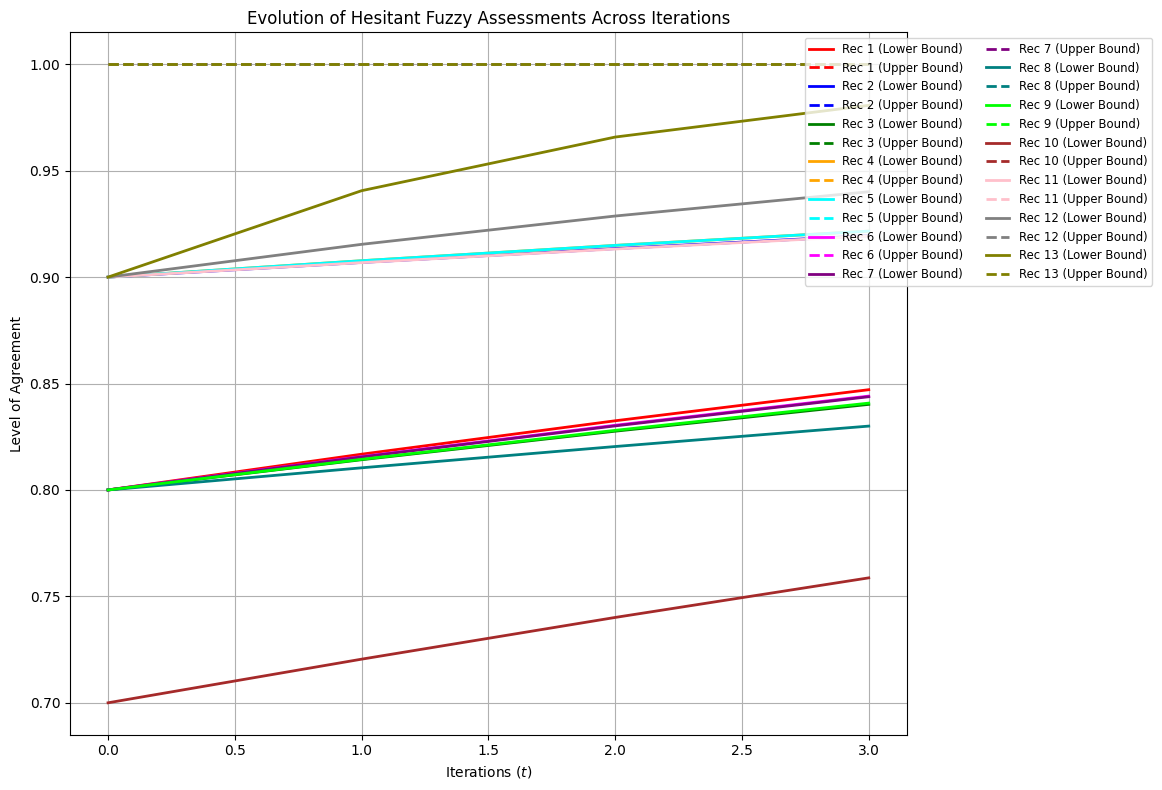

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Función para calcular cotas inferiores y superiores de cada recomendación
def calculate_bounds(history):
    lower_bounds = []
    upper_bounds = []
    for state in history:
        rec_lower = []
        rec_upper = []
        for recommendation in state:
            flattened = [item for sublist in recommendation for item in sublist]
            rec_lower.append(min(flattened))  # Cota inferior
            rec_upper.append(max(flattened))  # Cota superior
        lower_bounds.append(rec_lower)
        upper_bounds.append(rec_upper)
    return np.array(lower_bounds), np.array(upper_bounds)

# Función para graficar la evolución de las recomendaciones
def plot_evolution(lower_bounds, upper_bounds, iterations):
    x = np.arange(iterations + 1)  # Rango de iteraciones
    colors = [
        'red', 'blue', 'green', 'orange', 'cyan', 'magenta', 'purple',
        'teal', 'lime', 'brown', 'pink', 'gray', 'olive'
    ]

    plt.figure(figsize=(12, 8))
    for i in range(lower_bounds.shape[1]):  # Para cada recomendación
        plt.plot(x, lower_bounds[:, i], color=colors[i], linestyle='solid', linewidth=2,
                 label=f'Rec {i + 1} (Lower Bound)')
        plt.plot(x, upper_bounds[:, i], color=colors[i], linestyle='dashed', linewidth=2,
                 label=f'Rec {i + 1} (Upper Bound)')

    plt.xlabel('Iterations ($t$)')
    plt.ylabel('Level of Agreement')
    plt.title('Evolution of Hesitant Fuzzy Assessments Across Iterations')
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), fontsize='small', ncol=2)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Cálculo de cotas y generación de gráfico
lower_bounds, upper_bounds = calculate_bounds(results)
plot_evolution(lower_bounds, upper_bounds, iterations)


In [4]:
import numpy as np

# Parámetros
K = 0.1  # Parámetro de resistencia al cambio
iterations = 3  # Número de iteraciones adicionales (t=1)

# Matriz de pesos para 13 recomendaciones y 13 recomendaciones
weights = np.array([
    [1, 0.25, 0, 0, 0, 0, 0, 0, 0, 0, 0.2, 0.15, 0.4],  # Rec1
    [0, 1, 0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0.15, 0.4],      # Rec2
    [0, 0, 1, 0, 0, 0, 0, 0.25, 0, 0, 0, 0.15, 0.4],     # Rec3
    [0, 0, 0, 1, 0.3, 0, 0, 0, 0, 0, 0, 0.15, 0.4],      # Rec4
    [0, 0, 0, 0.3, 1, 0, 0, 0, 0, 0, 0, 0.15, 0.4],      # Rec5
    [0, 0, 0, 0, 0, 1, 0.35, 0, 0, 0, 0, 0.15, 0.4],     # Rec6
    [0, 0, 0, 0, 0, 0.35, 1, 0, 0, 0, 0, 0.15, 0.4],     # Rec7
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0.15, 0.4],        # Rec8
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0.3, 0, 0.15, 0.4],      # Rec9
    [0, 0, 0, 0, 0, 0, 0, 0, 0.3, 1, 0, 0.15, 0.4],      # Rec10
    [0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0.15, 0.4],      # Rec11
    [0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 1, 0.15],  # Rec12
    [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 1]          # Rec13
])

# Evaluaciones fuzzy hesitantes iniciales para 13 recomendaciones y 10 expertos
initial_assessments = [
    # Rec1
    [[0.9], [0.8, 0.9], [0.9], [0.9, 1], [0.8, 0.9], [0.9], [0.9, 1], [1], [0.8, 0.9], [0.8]],
    # Rec2
    [[1], [0.9, 1], [1], [0.9], [0.9], [0.9, 1], [1], [0.9], [1], [0.9]],
    # Rec3
    [[0.9], [0.8, 0.9], [0.9], [1], [0.9], [0.9, 1], [0.9], [1], [1], [0.9]],
    # Rec4
    [[1], [0.9, 1], [0.9], [0.9], [1], [0.9, 1], [1], [0.9], [0.9], [0.9]],
    # Rec5
    [[0.9], [0.9], [0.9, 1], [0.9], [0.9, 1], [1], [0.9], [0.9], [1], [0.9, 1]],
    # Rec6
    [[0.8, 0.9], [0.9], [0.9], [1], [1], [0.9], [0.9, 1], [0.9], [1], [0.9, 1]],
    # Rec7
    [[0.9], [1], [0.8, 0.9], [0.9], [0.9], [0.9], [0.9], [0.9], [0.9, 1], [1]],
    # Rec8
    [[1], [0.8, 0.9], [0.9], [0.9, 1], [1], [0.9], [0.9], [0.9, 1], [0.9], [0.9]],
    # Rec9
    [[0.8, 0.9], [0.9], [0.9], [0.9, 1], [0.9], [0.9, 1], [0.8, 0.9], [0.9], [0.9, 1], [0.9]],
    # Rec10
    [[0.9], [0.8, 0.9], [0.9], [0.9], [0.9], [0.7, 0.8], [0.9], [0.9], [0.9, 1], [0.9]],
    # Rec11
    [[1], [0.9], [0.9], [0.9, 1], [1], [0.9, 1], [0.9], [1], [1], [0.9]],
    # Rec12
    [[0.9], [1], [0.9], [0.9, 1], [1], [0.9, 1], [0.9], [0.9, 1], [0.9], [0.9]],
    # Rec13
    [[0.9, 1], [1], [1], [0.9, 1], [1], [1], [1], [0.9, 1], [0.9, 1], [1]]
]

# Función de activación
def activation_function(H, delta, K):
    return min(max(H + K * delta * H * (1 - H), 0), 1)

# Agregación de evaluaciones utilizando FGM
def aggregate_evaluations_FGM(assessments):
    aggregated = []
    for recommendation in assessments:
        per_expert_geometric_means = []
        for expert in recommendation:
            if len(expert) > 1:
                product = np.prod(expert)
                gm = product ** (1 / len(expert))
            else:
                gm = expert[0]
            per_expert_geometric_means.append(gm)
        # FGM: media geométrica de las medias geométricas de los expertos
        product_all = np.prod(per_expert_geometric_means)
        fgm = product_all ** (1 / len(per_expert_geometric_means))
        aggregated.append(fgm)
    return np.array(aggregated)

# Modelo D-HFCM con FGM
def dhfcm_FGM(weights, initial_assessments, iterations, K):
    current_assessments = initial_assessments.copy()
    history = [current_assessments.copy()]

    for t in range(iterations):
        # Paso 1: Agregación de evaluaciones utilizando FGM
        aggregated = aggregate_evaluations_FGM(current_assessments)

        # Paso 2: Actualización de evaluaciones hesitantes
        new_assessments = []
        for i, recommendation in enumerate(current_assessments):
            new_recommendation = []
            for e, expert in enumerate(recommendation):
                updated_values = []
                for H in expert:
                    delta = sum(weights[i, j] * aggregated[j] for j in range(len(weights))) - H
                    updated_H = activation_function(H, delta, K)
                    updated_values.append(round(updated_H, 6))  # Redondear para mayor precisión
                new_recommendation.append(updated_values)
            new_assessments.append(new_recommendation)

        # Paso 3: Guardar el nuevo estado
        current_assessments = new_assessments
        history.append(current_assessments.copy())

    return history

# Ejecutar el modelo
results = dhfcm_FGM(weights, initial_assessments, iterations, K)

# Función para calcular las evaluaciones agregadas en cada iteración
def compute_aggregated_FGM(history):
    aggregated_history = []
    for state in history:
        aggregated = aggregate_evaluations_FGM(state)
        aggregated_history.append([round(a,6) for a in aggregated])
    return aggregated_history

aggregated_history = compute_aggregated_FGM(results)

# Función para generar tablas en LaTeX para cada iteración
def generate_latex_tables(history, aggregated_history):
    latex_tables = []
    for t, state in enumerate(history):
        latex = f"""
\\subsubsection{{Resumen de las Evaluaciones Después de la Iteración $t = {t}$}}

\\begin{{center}}
\\begin{{tabular}}{{|c|{"|c" * 10}|c|}}
\\hline
\\textbf{{Recomendación}} & {" & ".join([f"Experto {e+1}" for e in range(10)])} & \\textbf{{Evaluación Agregada}} \\\\ \\hline
"""
        for i, recommendation in enumerate(state):
            rec_label = f"Rec {i+1}"
            hesitants = [ "{" + ", ".join([f"{h:.4f}" for h in expert]) + "}" for expert in recommendation ]
            agg = f"{aggregated_history[t][i]:.6f}"
            latex += f"{rec_label} & " + " & ".join(hesitants) + f" & {agg} \\\\ \\hline\n"
        latex += "\\end{tabular}\n\\end{center}"
        latex_tables.append(latex)
    return latex_tables

# Generar tablas en LaTeX
latex_tables = generate_latex_tables(results, aggregated_history)

# Mostrar las tablas para las dos primeras iteraciones (t=0, t=1 y t=2)
for t in range(3):
    print(latex_tables[t])
    print("\n")



\subsubsection{Resumen de las Evaluaciones Después de la Iteración $t = 0$}

\begin{center}
\begin{tabular}{|c||c|c|c|c|c|c|c|c|c|c|c|}
\hline
\textbf{Recomendación} & Experto 1 & Experto 2 & Experto 3 & Experto 4 & Experto 5 & Experto 6 & Experto 7 & Experto 8 & Experto 9 & Experto 10 & \textbf{Evaluación Agregada} \\ \hline
Rec 1 & {0.9000} & {0.8000, 0.9000} & {0.9000} & {0.9000, 1.0000} & {0.8000, 0.9000} & {0.9000} & {0.9000, 1.0000} & {1.0000} & {0.8000, 0.9000} & {0.8000} & 0.892495 \\ \hline
Rec 2 & {1.0000} & {0.9000, 1.0000} & {1.0000} & {0.9000} & {0.9000} & {0.9000, 1.0000} & {1.0000} & {0.9000} & {1.0000} & {0.9000} & 0.948683 \\ \hline
Rec 3 & {0.9000} & {0.8000, 0.9000} & {0.9000} & {1.0000} & {0.9000} & {0.9000, 1.0000} & {0.9000} & {1.0000} & {1.0000} & {0.9000} & 0.928325 \\ \hline
Rec 4 & {1.0000} & {0.9000, 1.0000} & {0.9000} & {0.9000} & {1.0000} & {0.9000, 1.0000} & {1.0000} & {0.9000} & {0.9000} & {0.9000} & 0.938740 \\ \hline
Rec 5 & {0.9000} & {0.9000} & {0.90

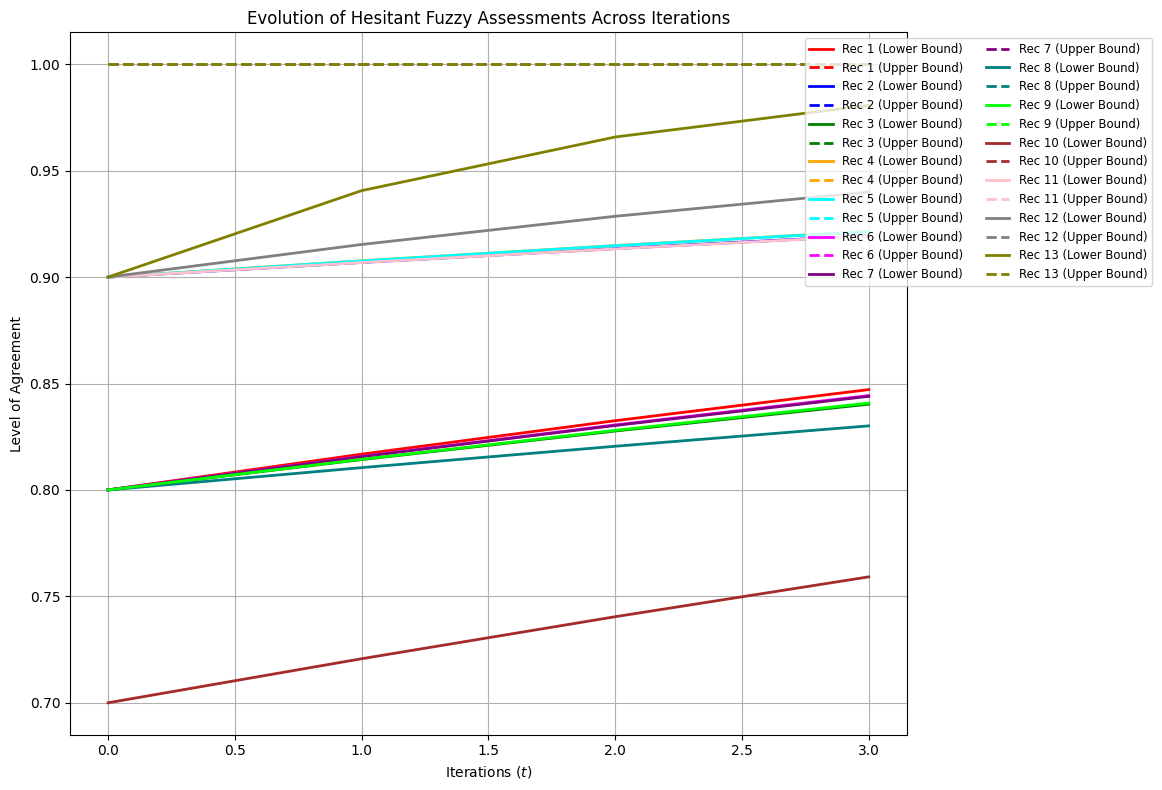

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Función para calcular cotas inferiores y superiores de cada recomendación
def calculate_bounds(history):
    lower_bounds = []
    upper_bounds = []
    for state in history:
        rec_lower = []
        rec_upper = []
        for recommendation in state:
            flattened = [item for sublist in recommendation for item in sublist]
            rec_lower.append(min(flattened))  # Cota inferior
            rec_upper.append(max(flattened))  # Cota superior
        lower_bounds.append(rec_lower)
        upper_bounds.append(rec_upper)
    return np.array(lower_bounds), np.array(upper_bounds)

# Función para graficar la evolución de las recomendaciones
def plot_evolution(lower_bounds, upper_bounds, iterations):
    x = np.arange(iterations + 1)  # Rango de iteraciones
    colors = [
        'red', 'blue', 'green', 'orange', 'cyan', 'magenta', 'purple',
        'teal', 'lime', 'brown', 'pink', 'gray', 'olive'
    ]

    plt.figure(figsize=(12, 8))
    for i in range(lower_bounds.shape[1]):  # Para cada recomendación
        plt.plot(x, lower_bounds[:, i], color=colors[i], linestyle='solid', linewidth=2,
                 label=f'Rec {i + 1} (Lower Bound)')
        plt.plot(x, upper_bounds[:, i], color=colors[i], linestyle='dashed', linewidth=2,
                 label=f'Rec {i + 1} (Upper Bound)')

    plt.xlabel('Iterations ($t$)')
    plt.ylabel('Level of Agreement')
    plt.title('Evolution of Hesitant Fuzzy Assessments Across Iterations')
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), fontsize='small', ncol=2)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Cálculo de cotas y generación de gráfico
lower_bounds, upper_bounds = calculate_bounds(results)
plot_evolution(lower_bounds, upper_bounds, iterations)


Si ya conoces Colab, echa un vistazo a este vídeo para obtener información sobre las tablas interactivas, la vista del historial de código ejecutado y la paleta de comandos.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  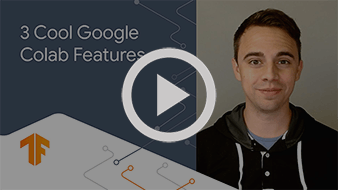
  </a>
</center>

<div class="markdown-google-sans">
  <h2>¿Qué es Colaboratory?</h2>
</div>

Colab, también conocido como "Colaboratory", te permite programar y ejecutar Python en tu navegador con las siguientes ventajas:
- No requiere configuración
- Acceso a GPUs sin coste adicional
- Permite compartir contenido fácilmente

Colab puede facilitar tu trabajo, ya seas <strong>estudiante</strong>, <strong>científico de datos</strong> o <strong>investigador de IA</strong>. No te pierdas el vídeo de <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Introducción a Colab</a> para obtener más información. O simplemente empieza con los pasos descritos más abajo.

<div class="markdown-google-sans">

## <strong>Primeros pasos</strong>
</div>

El documento que estás leyendo no es una página web estática, sino un entorno interactivo denominado <strong>cuaderno de Colab</strong> que te permite escribir y ejecutar código.

Por ejemplo, a continuación se muestra una <strong>celda de código</strong> con una breve secuencia de comandos de Python que calcula un valor, lo almacena en una variable e imprime el resultado:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

Si quieres ejecutar el código de la celda anterior, haz clic para seleccionarlo y pulsa el botón de reproducir situado a la izquierda del código o usa la combinación de teclas "Comando/Ctrl + Intro". Para editar el código, solo tienes que hacer clic en la celda.

Las variables que definas en una celda se pueden usar después en otras celdas:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Los cuadernos de Colab te permiten combinar <strong>código ejecutable</strong> y <strong>texto enriquecido</strong> en un mismo documento, además de <strong>imágenes</strong>, <strong>HTML</strong>, <strong>LaTeX</strong> y mucho más. Los cuadernos que creas en Colab se almacenan en tu cuenta de Google Drive. Puedes compartir tus cuadernos de Colab fácilmente con compañeros de trabajo o amigos, lo que les permite comentarlos o incluso editarlos. Consulta más información en <a href="/notebooks/basic_features_overview.ipynb">Información general sobre Colab</a>. Para crear un cuaderno de Colab, puedes usar el menú Archivo que aparece arriba o bien acceder al enlace para <a href="http://colab.research.google.com#create=true">crear un cuaderno de Colab</a>.

Los cuadernos de Colab son cuadernos de Jupyter alojados en Colab. Para obtener más información sobre el proyecto Jupyter, visita <a href="https://www.jupyter.org">jupyter.org</a>.

<div class="markdown-google-sans">

## Ciencia de datos
</div>

Con Colab, puedes aprovechar toda la potencia de las bibliotecas más populares de Python para analizar y visualizar datos. La celda de código de abajo utiliza <strong>NumPy</strong> para generar datos aleatorios y <strong>Matplotlib</strong> para visualizarlos. Para editar el código, solo tienes que hacer clic en la celda.

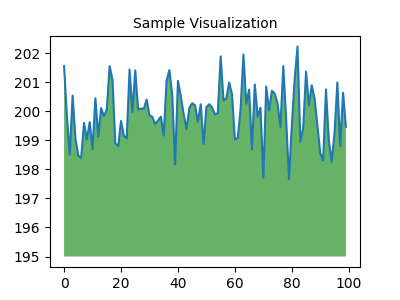

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Puedes importar tus propios datos a los cuadernos de Colab desde tu cuenta de Google Drive, incluidas las hojas de cálculo, y también desde GitHub y muchas fuentes más. Para obtener más información sobre cómo importar datos y cómo se puede usar Colab en la ciencia de datos, consulta los enlaces que aparecen en la sección <a href="#working-with-data">Trabajar con datos</a> más abajo.

<div class="markdown-google-sans">

## Aprendizaje automático
</div>

Con Colab, puedes importar un conjunto de datos de imágenes, entrenar un clasificador de imágenes con dicho conjunto de datos y evaluar el modelo con tan solo usar unas <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">pocas líneas de código</a>. Los cuadernos de Colab ejecutan código en los servidores en la nube de Google, lo que te permite aprovechar la potencia del hardware de Google, incluidas las <a href="#using-accelerated-hardware">GPU y TPU</a>, independientemente de la potencia de tu equipo. Lo único que necesitas es un navegador.

Colab es una herramienta muy utilizada en la comunidad de aprendizaje automático. Estos son algunos ejemplos de las aplicaciones que tiene Colab:
- Dar los primeros pasos con TensorFlow
- Desarrollar y entrenar redes neuronales
- Experimentar con TPUs
- Divulgar datos de investigación sobre IA
- Crear tutoriales

Para ver cuadernos de Colab que demuestran las aplicaciones del aprendizaje automático, consulta los <a href="#machine-learning-examples">ejemplos de aprendizaje automático</a> de abajo.

<div class="markdown-google-sans">

## Más recursos

### Trabajar con cuadernos en Colab

</div>

- [Información general sobre Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guía de Markdown](/notebooks/markdown_guide.ipynb)
- [Importar bibliotecas e instalar dependencias](/notebooks/snippets/importing_libraries.ipynb)
- [Guardar y cargar cuadernos en GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Formularios interactivos](/notebooks/forms.ipynb)
- [Widgets interactivos](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Trabajar con datos
</div>

- [Cargar datos: Drive, Hojas de cálculo y Google Cloud Storage](/notebooks/io.ipynb)
- [Gráficos: visualización de datos](/notebooks/charts.ipynb)
- [Primeros pasos con BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Curso intensivo de aprendizaje automático

<div>

A continuación, se muestran algunos cuadernos del curso online de Google sobre aprendizaje automático. Para obtener más información, consulta el <a href="https://developers.google.com/machine-learning/crash-course/">sitio web del curso completo</a>.
- [Introducción a Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Regresión lineal con tf.keras usando datos sintéticos](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Uso de hardware acelerado
</div>

- [TensorFlow con GPUs](/notebooks/gpu.ipynb)
- [TensorFlow con TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Ejemplos destacados

</div>

- <a href="https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb">Reemplaza voces con NeMo</a>: usa NeMo, el kit de herramientas de IA conversacional de Nvidia, para sustituir una voz de un fragmento de audio por otra generada por ordenador.

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">Reentrenamiento de un clasificador de imágenes</a>: crea un modelo de Keras sobre un clasificador de imágenes preparado previamente para que distinga flores.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">Clasificación de textos</a>: clasifica las reseñas de películas de IMDb en <em>positivas</em> o <em>negativas</em>.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">Transferencia de estilo</a>: utiliza el aprendizaje profundo para transferir el estilo de una imagen a otra.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Codificador universal de frases multilingüe para preguntas y respuestas</a>: utiliza un modelo de aprendizaje automático para contestar preguntas con el conjunto de datos SQuAD.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">Interpolación de vídeo</a>: predice lo que ocurre entre el primer y el último fotograma de un vídeo.


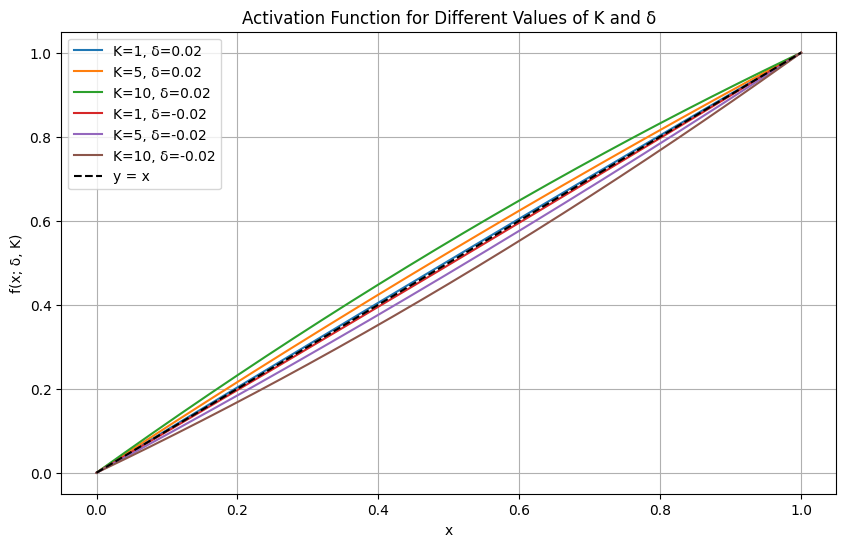

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def activation_function(x, delta, K):
    return x + K * delta * x * (1 - x)

# Valores de x en el intervalo [0,1]
x_values = np.linspace(0, 1, 400)

# Valores de K a considerar
K_values = [1, 5, 10]

# Influencias positivas y negativas
deltas = [0.02, -0.02]

plt.figure(figsize=(10, 6))

for delta in deltas:
    for K in K_values:
        y_values = activation_function(x_values, delta, K)
        # Recortar los valores para mantenerlos en [0,1]
        y_values = np.clip(y_values, 0, 1)
        label = f'K={K}, δ={delta}'
        plt.plot(x_values, y_values, label=label)

plt.plot(x_values, x_values, 'k--', label='y = x')  # Línea de referencia
plt.xlabel('x')
plt.ylabel('f(x; δ, K)')
plt.title('Activation Function for Different Values of K and δ')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Correcting the delta calculation function to handle hesitant fuzzy sets properly
def calculate_delta_corrected(initial, weights, i, j):
    """
    Calculate the δ value for a given element H_ij considering weights and influences.
    Properly handles hesitant fuzzy sets (lists) and single values.
    """
    delta = 0
    for k in range(len(initial)):
        if isinstance(initial[k][j], list):
            avg_kj = np.mean(initial[k][j])  # Average for the hesitant fuzzy set
            delta += weights[k][i] * (avg_kj - np.mean([np.mean(v) if isinstance(v, list) else v for v in initial[k]]))
        else:
            delta += weights[k][i] * (initial[k][j] - np.mean([np.mean(v) if isinstance(v, list) else v for v in initial[k]]))
    return delta

def correct_hesitant_update_corrected(initial, weights, K=10):
    """
    Perform a single iteration update for hesitant fuzzy assessments with corrected handling.
    """
    updated = []
    for i, row in enumerate(initial):
        row_updated = []
        for j, value in enumerate(row):
            if isinstance(value, list):
                # Handle hesitant fuzzy sets (lists)
                delta = calculate_delta_corrected(initial, weights, i, j)
                row_updated.append([correct_activation_function(v, delta, K) for v in value])
            else:
                # Handle single numeric values
                delta = calculate_delta_corrected(initial, weights, i, j)
                row_updated.append(correct_activation_function(value, delta, K))
        updated.append(row_updated)
    return updated

# Recalculate Iteration 1 and Iteration 2 with corrected function
iteration_1_corrected = correct_hesitant_update_corrected(initial_assessments, weights)
iteration_2_corrected = correct_hesitant_update_corrected(iteration_1_corrected, weights)

# Convert results to DataFrame for better visualization
df_iteration_1_corrected = pd.DataFrame(iteration_1_corrected, columns=[f'Expert {i+1}' for i in range(10)], index=[f'Rec {i+1}' for i in range(13)])
df_iteration_2_corrected = pd.DataFrame(iteration_2_corrected, columns=[f'Expert {i+1}' for i in range(10)], index=[f'Rec {i+1}' for i in range(13)])

tools.display_dataframe_to_user(name="Corrected Hesitant Fuzzy Assessments Iteration 1 (Updated Handling)", dataframe=df_iteration_1_corrected)
tools.display_dataframe_to_user(name="Corrected Hesitant Fuzzy Assessments Iteration 2 (Updated Handling)", dataframe=df_iteration_2_corrected)


NameError: name 'initial_assessments' is not defined

In [ ]:
import numpy as np
import pandas as pd

# Weight matrix as provided
weights = np.array([
    [0, 0.25, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2],
    [0, 0, 0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2],
    [0, 0, 0, 0, 0, 0, 0, 0.25, 0, 0, 0, 0, 0.2],
    [0, 0, 0, 0, 0.3, 0, 0, 0, 0, 0, 0, 0, 0.4],
    [0, 0, 0, 0.3, 0, 0, 0, 0, 0, 0, 0, 0, 0.4],
    [0, 0, 0, 0, 0, 0, 0.35, 0, 0, 0, 0, 0, 0.4],
    [0, 0, 0, 0, 0, 0.35, 0, 0, 0, 0, 0, 0, 0.4],
    [0, 0, 0.25, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.4],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.3, 0, 0, 0.4],
    [0, 0, 0, 0, 0, 0, 0, 0, 0.3, 0, 0, 0, 0.4],
    [0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.4],
    [0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15],
    [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0]
])

# Initial hesitant fuzzy assessments as a nested list
initial_assessments = [
    [[0.9], [0.8, 0.9], [0.9], [0.9, 1], [0.8, 0.9], [0.9], [0.9, 1], [1], [0.8, 0.9], [0.8]],
    [[1], [0.9, 1], [1], [0.9], [0.9], [0.9, 1], [1], [0.9], [1], [0.9]],
    [[0.9], [0.8, 0.9], [0.9], [1], [0.9], [0.9, 1], [0.9], [1], [1], [0.9]],
    [[1], [0.9, 1], [0.9], [0.9], [1], [0.9, 1], [1], [0.9], [0.9], [0.9]],
    [[0.9], [0.9], [0.9, 1], [0.9], [0.9, 1], [1], [0.9], [0.9], [1], [0.9, 1]],
    [[0.8, 0.9], [0.9], [0.9], [1], [1], [0.9], [0.9, 1], [0.9], [1], [0.9, 1]],
    [[0.9], [1], [0.8, 0.9], [0.9], [0.9], [0.9], [0.9], [0.9], [0.9, 1], [1]],
    [[1], [0.8, 0.9], [0.9], [0.9, 1], [1], [0.9], [0.9], [0.9, 1], [0.9], [0.9]],
    [[0.8, 0.9], [0.9], [0.9], [0.9, 1], [0.9], [0.9, 1], [0.8, 0.9], [0.9], [0.9, 1], [0.9]],
    [[0.9], [0.8, 0.9], [0.9], [0.9], [0.9], [0.7, 0.8], [0.9], [0.9], [0.9, 1], [0.9]],
    [[1], [0.9], [0.9], [0.9, 1], [1], [0.9, 1], [0.9], [1], [1], [0.9]],
    [[0.9], [1], [0.9], [0.9, 1], [1], [0.9, 1], [0.9], [0.9, 1], [0.9], [0.9]],
    [[0.9, 1], [1], [1], [0.9, 1], [1], [1], [1], [0.9, 1], [0.9, 1], [1]]
]

# Define the activation function
def correct_activation_function(x, delta, K):
    return x + K * delta * x * (1 - x)

# Correct delta calculation function
def calculate_delta_corrected(initial, weights, i, j):
    delta = 0
    for k in range(len(initial)):
        if isinstance(initial[k][j], list):
            avg_kj = np.mean(initial[k][j])
            delta += weights[k][i] * (avg_kj - np.mean([np.mean(v) if isinstance(v, list) else v for v in initial[k]]))
        else:
            delta += weights[k][i] * (initial[k][j] - np.mean([np.mean(v) if isinstance(v, list) else v for v in initial[k]]))
    return delta

# Correct hesitant update function
def correct_hesitant_update_corrected(initial, weights, K=10):
    updated = []
    for i, row in enumerate(initial):
        row_updated = []
        for j, value in enumerate(row):
            if isinstance(value, list):
                delta = calculate_delta_corrected(initial, weights, i, j)
                row_updated.append([correct_activation_function(v, delta, K) for v in value])
            else:
                delta = calculate_delta_corrected(initial, weights, i, j)
                row_updated.append(correct_activation_function(value, delta, K))
        updated.append(row_updated)
    return updated

# Perform iterations
iteration_1_corrected = correct_hesitant_update_corrected(initial_assessments, weights)
iteration_2_corrected = correct_hesitant_update_corrected(iteration_1_corrected, weights)

# Convert results to DataFrame for visualization
df_iteration_1_corrected = pd.DataFrame(iteration_1_corrected, columns=[f'Expert {i+1}' for i in range(10)], index=[f'Rec {i+1}' for i in range(13)])
df_iteration_2_corrected = pd.DataFrame(iteration_2_corrected, columns=[f'Expert {i+1}' for i in range(10)], index=[f'Rec {i+1}' for i in range(13)])

# Display DataFrames for Iteration 1 and Iteration 2
import ace_tools as tools
tools.display_dataframe_to_user(name="Corrected Hesitant Fuzzy Assessments Iteration 1", dataframe=df_iteration_1_corrected)
tools.display_dataframe_to_user(name="Corrected Hesitant Fuzzy Assessments Iteration 2", dataframe=df_iteration_2_corrected)


ModuleNotFoundError: No module named 'ace_tools'

In [ ]:
import numpy as np
import pandas as pd

# Weight matrix as provided
weights = np.array([
    [0, 0.25, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2],
    [0, 0, 0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2],
    [0, 0, 0, 0, 0, 0, 0, 0.25, 0, 0, 0, 0, 0.2],
    [0, 0, 0, 0, 0.3, 0, 0, 0, 0, 0, 0, 0, 0.4],
    [0, 0, 0, 0.3, 0, 0, 0, 0, 0, 0, 0, 0, 0.4],
    [0, 0, 0, 0, 0, 0, 0.35, 0, 0, 0, 0, 0, 0.4],
    [0, 0, 0, 0, 0, 0.35, 0, 0, 0, 0, 0, 0, 0.4],
    [0, 0, 0.25, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.4],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.3, 0, 0, 0.4],
    [0, 0, 0, 0, 0, 0, 0, 0, 0.3, 0, 0, 0, 0.4],
    [0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.4],
    [0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15],
    [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0]
])

# Initial hesitant fuzzy assessments as a nested list
initial_assessments = [
    [[0.9], [0.8, 0.9], [0.9], [0.9, 1], [0.8, 0.9], [0.9], [0.9, 1], [1], [0.8, 0.9], [0.8]],
    [[1], [0.9, 1], [1], [0.9], [0.9], [0.9, 1], [1], [0.9], [1], [0.9]],
    [[0.9], [0.8, 0.9], [0.9], [1], [0.9], [0.9, 1], [0.9], [1], [1], [0.9]],
    [[1], [0.9, 1], [0.9], [0.9], [1], [0.9, 1], [1], [0.9], [0.9], [0.9]],
    [[0.9], [0.9], [0.9, 1], [0.9], [0.9, 1], [1], [0.9], [0.9], [1], [0.9, 1]],
    [[0.8, 0.9], [0.9], [0.9], [1], [1], [0.9], [0.9, 1], [0.9], [1], [0.9, 1]],
    [[0.9], [1], [0.8, 0.9], [0.9], [0.9], [0.9], [0.9], [0.9], [0.9, 1], [1]],
    [[1], [0.8, 0.9], [0.9], [0.9, 1], [1], [0.9], [0.9], [0.9, 1], [0.9], [0.9]],
    [[0.8, 0.9], [0.9], [0.9], [0.9, 1], [0.9], [0.9, 1], [0.8, 0.9], [0.9], [0.9, 1], [0.9]],
    [[0.9], [0.8, 0.9], [0.9], [0.9], [0.9], [0.7, 0.8], [0.9], [0.9], [0.9, 1], [0.9]],
    [[1], [0.9], [0.9], [0.9, 1], [1], [0.9, 1], [0.9], [1], [1], [0.9]],
    [[0.9], [1], [0.9], [0.9, 1], [1], [0.9, 1], [0.9], [0.9, 1], [0.9], [0.9]],
    [[0.9, 1], [1], [1], [0.9, 1], [1], [1], [1], [0.9, 1], [0.9, 1], [1]]
]

# Define the activation function
def correct_activation_function(x, delta, K):
    return x + K * delta * x * (1 - x)

# Correct delta calculation function
def calculate_delta_corrected(initial, weights, i, j):
    delta = 0
    for k in range(len(initial)):
        avg_kj = np.mean(initial[k][j]) if isinstance(initial[k][j], list) else initial[k][j]
        delta += weights[k][i] * (avg_kj - np.mean([np.mean(v) if isinstance(v, list) else v for v in initial[k]]))
    return delta

# Correct hesitant update function
def correct_hesitant_update_corrected(initial, weights, K=10):
    updated = []
    for i, row in enumerate(initial):
        row_updated = []
        for j, value in enumerate(row):
            delta = calculate_delta_corrected(initial, weights, i, j)
            if isinstance(value, list):
                row_updated.append([correct_activation_function(v, delta, K) for v in value])
            else:
                row_updated.append(correct_activation_function(value, delta, K))
        updated.append(row_updated)
    return updated

# Perform iterations
iteration_1_corrected = correct_hesitant_update_corrected(initial_assessments, weights)
iteration_2_corrected = correct_hesitant_update_corrected(iteration_1_corrected, weights)

# Convert results to DataFrame for visualization
df_iteration_1_corrected = pd.DataFrame(iteration_1_corrected, columns=[f'Expert {i+1}' for i in range(10)], index=[f'Rec {i+1}' for i in range(13)])
df_iteration_2_corrected = pd.DataFrame(iteration_2_corrected, columns=[f'Expert {i+1}' for i in range(10)], index=[f'Rec {i+1}' for i in range(13)])

# Save results to Excel for easier visualization
df_iteration_1_corrected.to_excel("Iteration_1_Corrected.xlsx", index=True)
df_iteration_2_corrected.to_excel("Iteration_2_Corrected.xlsx", index=True)

# Print to console
print("Iteration 1 Results:")
print(df_iteration_1_corrected)
print("\nIteration 2 Results:")
print(df_iteration_2_corrected)


Iteration 1 Results:
                                        Expert 1  \
Rec 1                                 [0.893475]   
Rec 2                                      [1.0]   
Rec 3                       [0.9103500000000001]   
Rec 4                                      [1.0]   
Rec 5                                 [0.900675]   
Rec 6   [0.7612000000000002, 0.8781750000000001]   
Rec 7                       [0.8577000000000001]   
Rec 8                                      [1.0]   
Rec 9   [0.7796000000000001, 0.8885250000000001]   
Rec 10                      [0.8696250000000001]   
Rec 11                                     [1.0]   
Rec 12                                [0.884475]   
Rec 13                 [0.9015750000000001, 1.0]   

                                        Expert 2  \
Rec 1   [0.8124000000000001, 0.9069750000000001]   
Rec 2                             [0.90585, 1.0]   
Rec 3   [0.7984000000000001, 0.8991000000000001]   
Rec 4                  [0.9065250000000001

In [ ]:
import numpy as np
import pandas as pd
from math import prod

# Peso y evaluaciones iniciales
weights = np.array([
    [0, 0.25, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2],
    [0, 0, 0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2],
    [0, 0, 0, 0, 0, 0, 0, 0.25, 0, 0, 0, 0, 0.2],
    [0, 0, 0, 0, 0.3, 0, 0, 0, 0, 0, 0, 0, 0.4],
    [0, 0, 0, 0.3, 0, 0, 0, 0, 0, 0, 0, 0, 0.4],
    [0, 0, 0, 0, 0, 0, 0.35, 0, 0, 0, 0, 0, 0.4],
    [0, 0, 0, 0, 0, 0.35, 0, 0, 0, 0, 0, 0, 0.4],
    [0, 0, 0.25, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.4],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.3, 0, 0, 0.4],
    [0, 0, 0, 0, 0, 0, 0, 0, 0.3, 0, 0, 0, 0.4],
    [0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.4],
    [0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15],
    [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0]
])

initial_assessments = [
    [[0.9], [0.8, 0.9], [0.9], [0.9, 1], [0.8, 0.9], [0.9], [0.9, 1], [1], [0.8, 0.9], [0.8]],
    [[1], [0.9, 1], [1], [0.9], [0.9], [0.9, 1], [1], [0.9], [1], [0.9]],
    [[0.9], [0.8, 0.9], [0.9], [1], [0.9], [0.9, 1], [0.9], [1], [1], [0.9]],
    [[1], [0.9, 1], [0.9], [0.9], [1], [0.9, 1], [1], [0.9], [0.9], [0.9]],
    [[0.9], [0.9], [0.9, 1], [0.9], [0.9, 1], [1], [0.9], [0.9], [1], [0.9, 1]],
    [[0.8, 0.9], [0.9], [0.9], [1], [1], [0.9], [0.9, 1], [0.9], [1], [0.9, 1]],
    [[0.9], [1], [0.8, 0.9], [0.9], [0.9], [0.9], [0.9], [0.9], [0.9, 1], [1]],
    [[1], [0.8, 0.9], [0.9], [0.9, 1], [1], [0.9], [0.9], [0.9, 1], [0.9], [0.9]],
    [[0.8, 0.9], [0.9], [0.9], [0.9, 1], [0.9], [0.9, 1], [0.8, 0.9], [0.9], [0.9, 1], [0.9]],
    [[0.9], [0.8, 0.9], [0.9], [0.9], [0.9], [0.7, 0.8], [0.9], [0.9], [0.9, 1], [0.9]],
    [[1], [0.9], [0.9], [0.9, 1], [1], [0.9, 1], [0.9], [1], [1], [0.9]],
    [[0.9], [1], [0.9], [0.9, 1], [1], [0.9, 1], [0.9], [0.9, 1], [0.9], [0.9]],
    [[0.9, 1], [1], [1], [0.9, 1], [1], [1], [1], [0.9, 1], [0.9, 1], [1]]
]

# Define FGM (Fuzzy Geometric Mean) function
def fuzzy_geometric_mean(hesitant_values):
    flattened = []
    for hset in hesitant_values:
        if isinstance(hset, list):
            flattened.append(np.sqrt(np.prod(hset)))
        else:
            flattened.append(hset)
    return prod(flattened) ** (1 / len(flattened))

# Replace the aggregation function with FGM
def calculate_delta_fgm(initial, weights, i, j):
    delta = 0
    aggregated = [fuzzy_geometric_mean(row) for row in initial]
    for k in range(len(initial)):
        delta += weights[k][i] * (aggregated[j] - aggregated[k])
    return delta

# Correct hesitant update function
def correct_hesitant_update_fgm(initial, weights, K=10):
    updated = []
    for i, row in enumerate(initial):
        row_updated = []
        for j, value in enumerate(row):
            delta = calculate_delta_fgm(initial, weights, i, j)
            if isinstance(value, list):
                row_updated.append([v + K * delta * v * (1 - v) for v in value])
            else:
                row_updated.append(value + K * delta * value * (1 - value))
        updated.append(row_updated)
    return updated

# Perform iterations
iteration_1_fgm = correct_hesitant_update_fgm(initial_assessments, weights)
iteration_2_fgm = correct_hesitant_update_fgm(iteration_1_fgm, weights)

# Convert results to DataFrame for visualization
df_iteration_1_fgm = pd.DataFrame(iteration_1_fgm, columns=[f'Expert {i+1}' for i in range(10)], index=[f'Rec {i+1}' for i in range(13)])
df_iteration_2_fgm = pd.DataFrame(iteration_2_fgm, columns=[f'Expert {i+1}' for i in range(10)], index=[f'Rec {i+1}' for i in range(13)])

# Display DataFrames for Iteration 1 and Iteration 2
df_iteration_1_fgm, df_iteration_2_fgm


(                                        Expert 1  \
 Rec 1                       [0.8625758909455248]   
 Rec 2                                      [1.0]   
 Rec 3                        [0.855553877721831]   
 Rec 4                                      [1.0]   
 Rec 5                       [0.8592702998388203]   
 Rec 6   [0.7326315213862304, 0.8621052307797546]   
 Rec 7                       [0.8605277851900636]   
 Rec 8                                      [1.0]   
 Rec 9   [0.7504549421547564, 0.8721309049620505]   
 Rec 10                       [0.869002984579182]   
 Rec 11                                     [1.0]   
 Rec 12                      [0.8719360492929259]   
 Rec 13                 [0.7886395612917795, 1.0]   
 
                                         Expert 2  \
 Rec 1   [0.7958693062191627, 0.8976764847482791]   
 Rec 2                  [0.9093766826825305, 1.0]   
 Rec 3   [0.8041860790379319, 0.9023546694588367]   
 Rec 4                  [0.9004182390827108,